In [6]:
import pandas as pd
import plotly.express as px
from script import test_stationarity
from script import check_required_differencing
from script import arima_model

In [2]:
df = pd.read_csv('MSDT2_HPIRZ_observed.csv')
df['validTime'] = pd.to_datetime(df['validTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   validTime       664 non-null    datetime64[ns, UTC]
 1   primary         664 non-null    float64            
 2   primaryUnits    664 non-null    object             
 3   secondary       664 non-null    float64            
 4   secondaryUnits  664 non-null    object             
 5   generatedTime   664 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 31.3+ KB


In [3]:
fig = px.line(df, x='validTime', y='primary', title='Colorado River') 
fig.update_layout(xaxis_title='Time', yaxis_title='Stage [ft]')
fig.show()

In [4]:
test_stationarity(df['primary'], 'kpss')
test_stationarity(df['primary'], 'adfuller')

Test: kpss
Test Statistic: 2.8033
p-value: 0.0100
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Test: adfuller
Test Statistic: -1.4512
p-value: 0.5575
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569



c:\Users\DELL\Desktop\renewables_by_artur\renewables\script\test_stationarity.py:17: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [5]:
check_required_differencing(df, 'primary')

------- Differencing required for stationarity (trend)-------
Differencing required (adf): 0
Differencing required (kpss): 1
Differencing required (pp): 0
------- Differencing required for stationarity (seasonality) -------
Differencing required for seasonality (OCSB): 0
Differencing required for seasonality (CH): 0


In [16]:
model = arima_model(df['primary'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3113.443, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3138.294, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3154.507, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3115.351, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3161.475, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3146.247, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3155.799, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3164.794, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3166.532, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3156.297, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3164.539, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3163.219, Time=0.26 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 4.027 seconds


In [13]:
predictions = []
for i in range(100):
    predictions.append(model.predict(n_periods=1))


In [33]:
predictions = model.predict(n_periods=100)

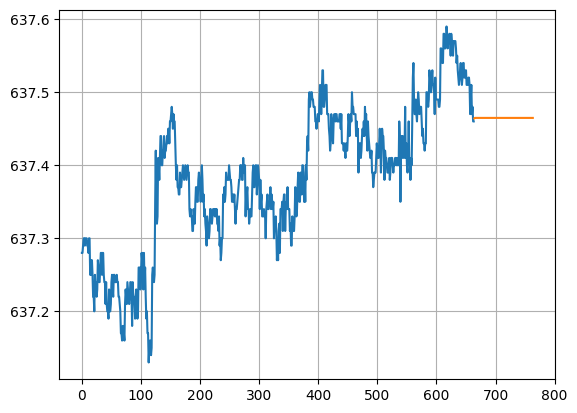

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df['primary'])
plt.plot(np.arange(len(df['primary']), len(df['primary'])+len(predictions)),predictions.values,'-')
plt.grid('on')

In [11]:
fig = px.line(df, x='validTime', y='primary', title='Barton Creek in Austin') 
fig.update_layout(xaxis_title='Time', yaxis_title='Stage [ft]')
fig.show()

In [17]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
# plot first variable on primary y-axis
fig.add_trace(go.Scatter(x=df['validTime'], y=df['primary']), secondary_y=False)

# plot second variable on secondary y-axis
fig.add_trace(go.Scatter(x=df['validTime'], y=df['secondary']), secondary_y=True)

# set y-axis titles
fig.update_layout(yaxis_title='Stage [ft]')
fig.update_layout(yaxis2_title='flow rate [kcfs]')
fig.update_layout(title='Barton Creek in Austin', title_x=0.5)

# fig.show()
fig.write_html('Baton_Creek_Example.html')


In [25]:
df = pd.read_csv(files[0])
df['validTime'] = pd.to_datetime(df['validTime'])

In [27]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
# plot first variable on primary y-axis
fig.add_trace(go.Scatter(x=df['validTime'], y=df['primary']), secondary_y=False)

# plot second variable on secondary y-axis
fig.add_trace(go.Scatter(x=df['validTime'], y=df['secondary']), secondary_y=True)

# set y-axis titles
fig.update_layout(yaxis_title='Stage [ft]')
fig.update_layout(yaxis2_title='flow rate [kcfs]')
fig.update_layout(title='Colorado River in Austin', title_x=0.5)

fig.show()
# fig.write_html('Colorado_River_Example.html')


In [29]:
df['random'] = df['primary']/df['secondary']

In [34]:
fig = px.line(df, x='validTime', y='secondary') 
fig.update_layout(xaxis_title='Time', yaxis_title='Stage [ft]')
fig.show()

In [30]:
fig = px.line(df, x='validTime', y='random') 
fig.update_layout(xaxis_title='Time', yaxis_title='Stage [ft]')
fig.show()